# Geometric Transformation

"The functions that can stretch, shrink, warp, and rotate an image are called geomatric transforms"

<b> As we learned previously, images in python is nothing but a numpy matrix. You can do any sort of matrix operation with that. There is a mathematical matrix operation called transformation. With transformation we can simply map a vector into a changed version of that vector. For an instance let's say I have an vector at location (x = 1, y = 1), this vector can be transformed into another place by applying a function. Let's say our function is f(x) = 2x, as I apply this function to that vector the value for x becomes 2 * 1 = 2. So the location where the vector was placed before has been moved to a different place.
    
An image in python being a matrix allows us to transform images into different geographical shapes. For an example I can rotate my image (changing the geographical shape), stretch, resize, move, all those things can be done through transformation. One common way that we see in many situations is the linear transformation. And in that we use a term called affine transformation. That describes that the origin of an image where the transformation should start from remains the same no matter what transformation you do. For an example, you can rotate the image around its center, so the origin remains same, you can angle the image, origin remains the same. 
    
In opencv we have two methods to accomplish affine transformation.
    
<ol>
    <li>warpAffine      -> takes 2 x 3 transformation matrix</li>
    <li>wrapPerspective -> takes 3 x 3 transformation matrix</li>
</ol>    
    
Here you see something called a transformation matrix. what is it?
    
    A transformation matrix is simply a parameter to a function that does the transormation. With the transformation matrix, I can state how much the cordinates values should be changed, for example, how much the x cordinates should be moved. 
   
We will look at these things in detailed,       
    

## Translation

<b> Translation is nothing but moving the image along the x axis or y axis. Translation can be done using the wrapAffine function. The way we tell the function how much the image should be moved is via the transform matrix.A sample tranform matrix is given below.
    
|1  0  100|<br>
|0  1  200|<br>
    
 Above, the first row of the matrix represents the x axis, and the second row for the y axis. For now, just forget the first two columns of the matrix, since we will cover that in affine transformation part. What we should focus now is the third column of the matrix. The value 100 says the image should move 100px in the x axis to the right, if you have provided a minus value there then the image will be moved in the left direction. the value 200 says the number of pixels that the image should be moved in y direction to the down of the axis, negative values will move the image to the up.
    
LET'S SEE SOME PRACTICAL EXAMPLE :-    

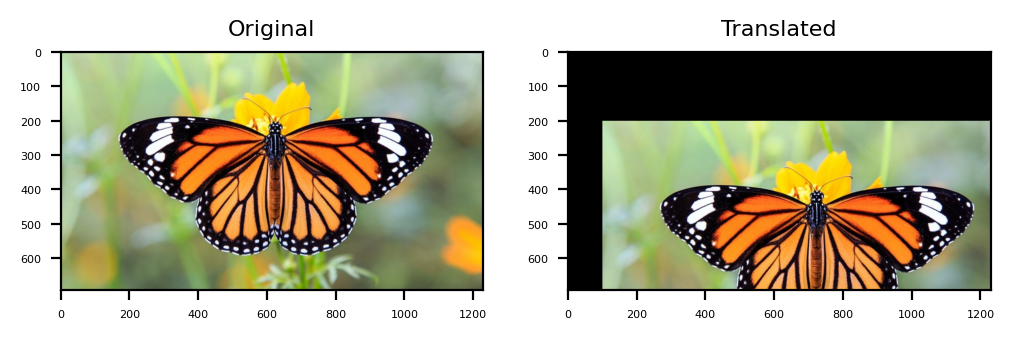

In [172]:
# Importing necessary modules.
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv


#let's create a function for showing 2 images
def showTwoImages(image1, image2, title1, title2):
    fig, (ax1, ax2) = plt.subplots(1,2)
    
    ax1.set_title(title1, size=8)
    ax2.set_title(title2, size=8)
    
    ax1.tick_params(axis='both', labelsize=4) #here i change size of the x and y ticks of ax1
    ax2.tick_params(axis='both', labelsize=4) #here i change size of the x and y ticks of ax2
    
    ax1.imshow(image1)
    ax2.imshow(image2)

# let's create a function for image translation    
def translate(image, x, y):
    M = np.float32([[1,0,x], [0,1,y]]) #this is the transformation matrix
    # this matrix should be type of float and 2 x 3 
    # here the image will be translated in the x direction and in the y direction for a given amount
    
    # we need to provide the width and height of the output image
    # if we need the same width and height of the original image, we can get that using the shape method
    height = image.shape[0] 
    width = image.shape[1]
    
    translated = cv.warpAffine(image, M, (width, height))
    # warpAffine method takes mainly 3 parameters
    #    1.) image
    #    2.) The transformation matrix
    #    3.) width and height of the output image.
    
    showTwoImages(image, translated, "Original", "Translated")
    # we use this method to show two images in the same cell
    
image = cv.cvtColor(cv.imread('./photos/butterfly.jpg'), cv.COLOR_BGR2RGB)
translate(image,x = 100,y = 200)

## Affine Transformation

<b> Let's talk a bit more about the tranfrom matrix that we used before for translating the image,
    
|1  0  100|<br>
|0  1  200|<br>

Here the first column of the first row  is for the width scale, and the second column of the second row is for the height scale. If you change the width scale, the width of the image will be changed; if you change the height scale of the image, the height of the image will be changed.
    
Let's see some example    

### Scaling the width

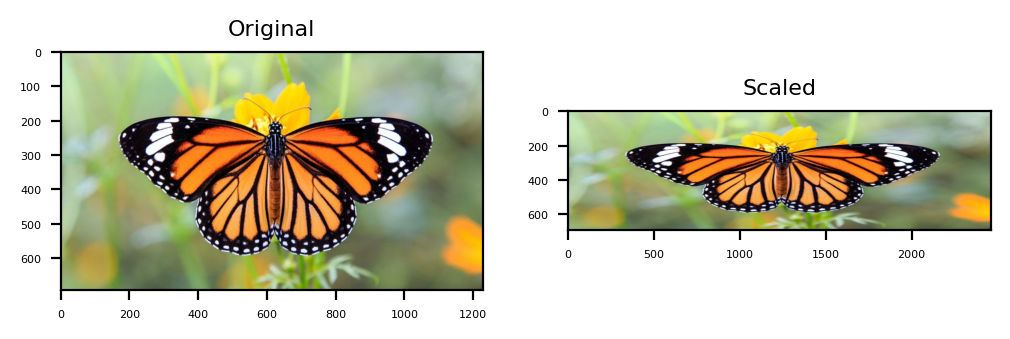

In [95]:
# let's create a function for scaling an image
def scaleImages(image, width_scale=1, height_scale=1):
    # here, if we scale the width, the width of the output image should also be scaled
    # otherwise we will not be able to see the full image
    # since we have provided default values to width and height scale parameters, there will not any issues.
    height = int(image.shape[0] * height_scale) 
    width = int(image.shape[1] * width_scale)
    
    # as you can see, the places where the scale factors were included are now replaced with the paramers of the function
    M = np.float32([[width_scale,0,0], [0,height_scale,0]]) #this is the transformation matrix
    
    
    scaled = cv.warpAffine(image, M, (width, height) )
    
    showTwoImages(image, scaled, "Original", "Scaled")
    

scaleImages(image, width_scale=2)    

# as you can see, the transform matrix determines the final output of the affine transformation

### Scaling the height

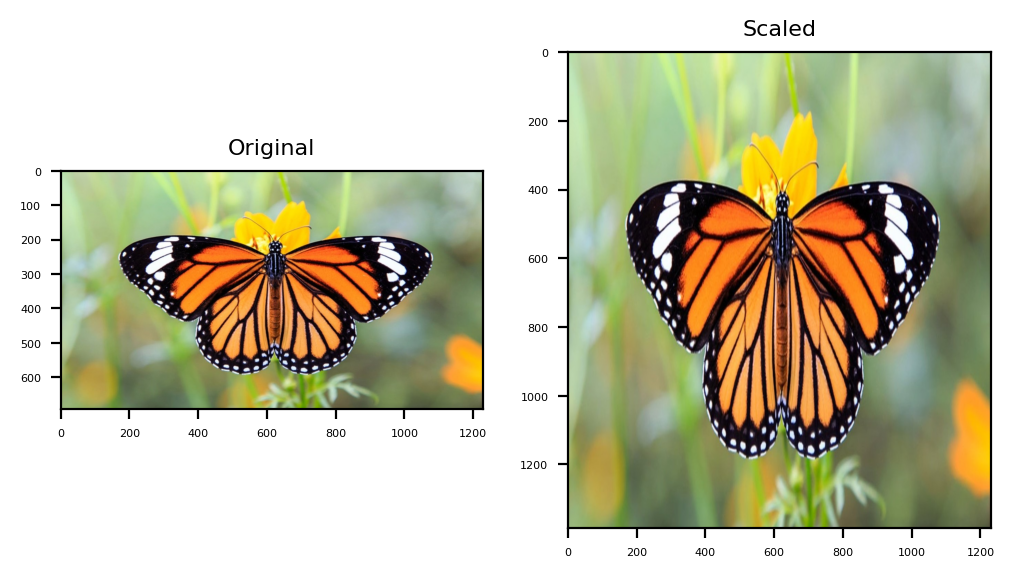

In [91]:
scaleImages(image, height_scale=2)  

### Scale both width and height

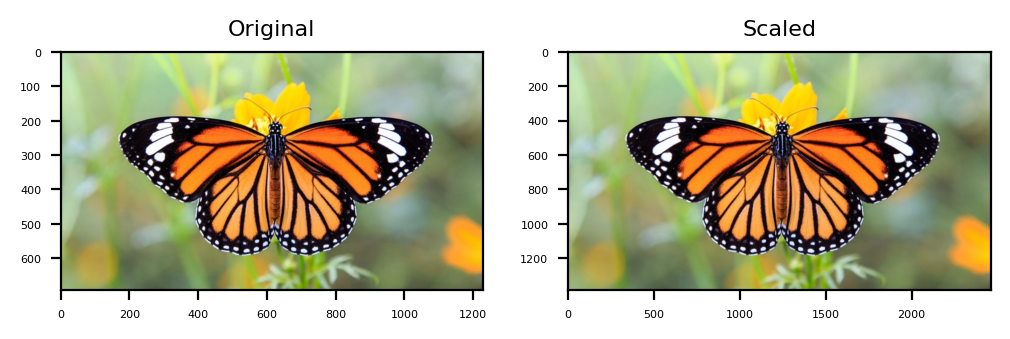

In [100]:
scaleImages(image, width_scale=2, height_scale=2)  

# although both of the following images seems identical, look at their x and y coordinates to see the difference

## Angle the image

<b> Upto now we know how to translate, scale images. If you notice, we have another two values in the transformation matrix that we did not use until now. So, let's look at it again.
    
|1  0  100|<br>
|0  1  200|<br>
    
Since we know the duty of some of these values, let's name those like below,
    
|width_scale  0   x_axis_translation|<br>
|0  height_scale  y_axix_translation|<br>
    
Still, we have two zeros left. What are those, what they are doing here?

The first zero which is in the first row represents how much the image should be angled in the x direction. When you change that zero to some other value, the y coordinates of the image will remain same, but the x coordinate will be changed to make the angle. 

Actually what happens here is a vector multiplication, to learn it more I suggest you read the wikipedia page for image transformation. But, you do not have to remember all the mathematics stuffs to use this.

The other zero which is in the second row represents the value to angle the image in y direction.
    
Let's take an example to understand this better,    

### Angle in the x direction

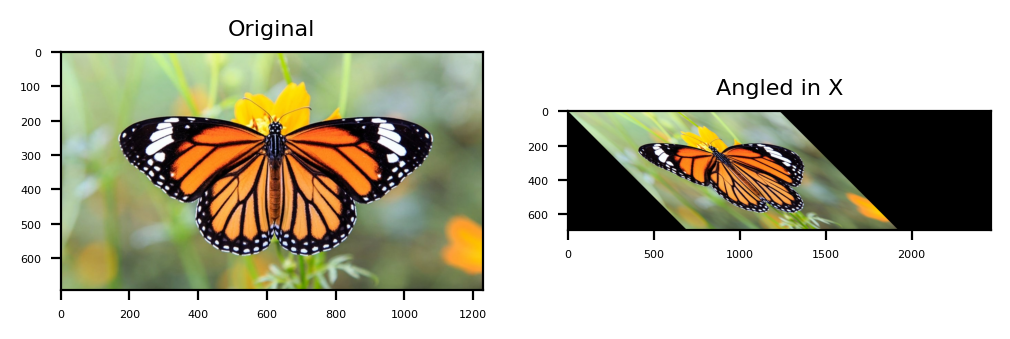

In [105]:
# as you can see below,
# the value 1 has been given to angle the image in x direction
# if you provide a negative value here the image will be angled in the opposite direction
M = np.float32([[1,1,0], [0,1,0]])

height = image.shape[0]
width = image.shape[1]

angled_in_x = cv.warpAffine(image, M, (width*2, height))
# here the output image width has been multiplied by 2 to show it properly.

showTwoImages(image, angled_in_x, "Original", "Angled in X")

### Angle in the y direction

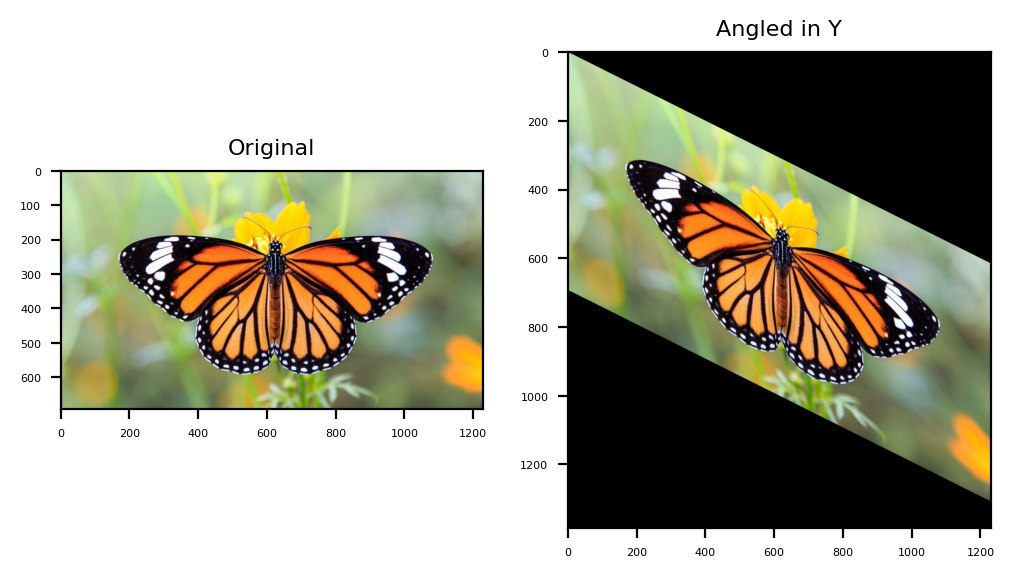

In [113]:
# as you can see below,
# the value 0.5 has been given to angle the image in y direction
# if you provide a negative value here the image will be angled in the opposite direction
# here you can give any value, I gave 0.5 to explain it better.Try with different values.
M = np.float32([[1,0,0], [0.5,1,0]])

height = image.shape[0]
width = image.shape[1]

angled_in_x = cv.warpAffine(image, M, (width, height*2))
# here the output image height has been multiplied by 2 to show it properly.

showTwoImages(image, angled_in_x, "Original", "Angled in Y")

<b> We can observe that when we are changing the value for x axis the y axis remains the same and vice versa. The other thing that we can observe here is that it is quite difficult to measure how much the image will be angled corresponding to the given value for warpAffine. Actually it is hard to say that the image will be angled this much if we provide this much number.

One possible solution is to use the cv.getAffineTransform method. This method takes two parameters. First, we have to provide coordinates for 3 points in the image; second, we have to provide the coordinates of those three points in the output image. Once we give those two parameters, the getAffineTransform method will return the relavent transform matrix for us.    <br><br>
    
Let's see an example    

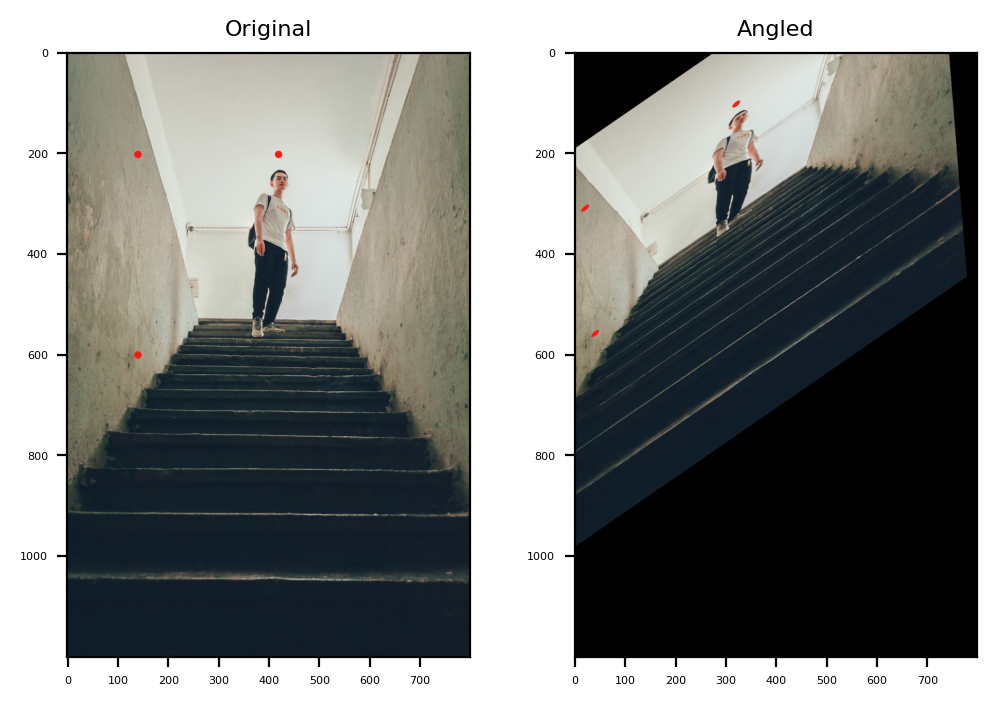

In [197]:
def angle(image, pts1, pts2):
    height = image.shape[0]
    width = image.shape[1]
    
    M = cv.getAffineTransform(pts1, pts2) # this will provide the transform matrix for us
    
    angled = cv.warpAffine(image, M, (width, height))
    
    showTwoImages(image, angled, "Original", "Angled")
    

# these are the three points of the input image (which you can see in three red circles)    
pts1 = np.float32([
    [150, 600],
    [150, 200],
    [420, 200]
])


#these are the three points of the output image (which you can see in three red circles)    
pts2 = np.float32([
    [50, 550],
    [30, 300],
    [320, 100]
])


"""

    what we are doing is that taking any arbitrary three points in the image and angle the image to 
    map those input points to the output point locations.

"""
image = cv.cvtColor(cv.imread('./photos/affine.png'), cv.COLOR_BGR2RGB)

angle(image,pts1, pts2)

## Image rotation

<b> For rotating an image we use the same warpAffine function, but the difference here is that we are now dealing with angles, not just numbers. You know that in mathematics we work with cos, sin, tan functions to handle angles. So, for rotating an image we use the same theory. There is a perticular image rotation matrix.
 
<img src="./photos/rotation_matrix.png" />    
    
Fortunately, opencv provides us a great way to git rid of that mathematics part. There is a function called getRotationMatrix2D, with this function we only have to provide the rotation point, angle and the scale; the function will return us the corresponding rotation matrix.    

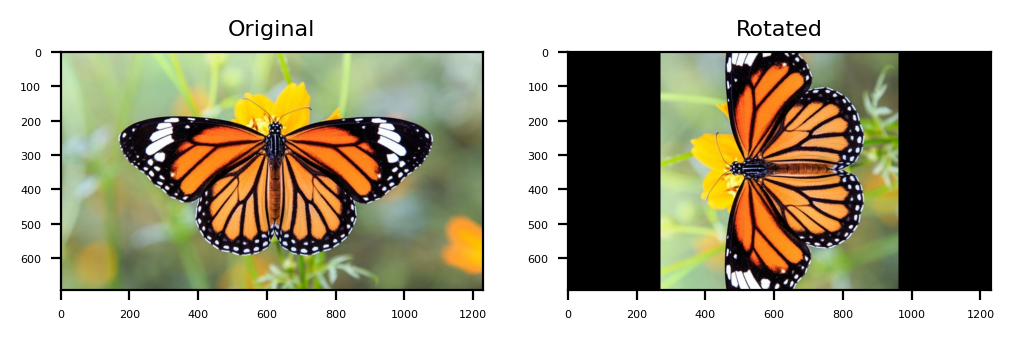

In [200]:
image = cv.cvtColor(cv.imread('./photos/butterfly.jpg'), cv.COLOR_BGR2RGB)

height = image.shape[0]
width = image.shape[1]

rotation_point = (((width)/2), ((height)/2)) 
# we use the center of the image as the rotation point

M = cv.getRotationMatrix2D(center=rotation_point, angle=90, scale=1)
"""
    getRotationMatrix2D takes 3 arguments
        1.) center or the rotation point
        2.) angle that the image should be rotated
        3.) scale means should it be zoomed or not

"""

rotated_image = cv.warpAffine(image, M, (width, height))

showTwoImages(image, rotated_image, "Original", "Rotated")

## Reflection

<b> We can reflect an image using warpAffine, but this time we need to provide -1 to the width_scale if we want to reflect it along the x axis, and if we want to reflect the image in y axis we should provide -1 to the height_scale. Now, what happens when you give those minus values? acutally it will make the image upside down (or rotate by 180) and will go out of the frame. Then we can give y axis or x axis translation values to bring it back to the correct position.

In [194]:
def reflect(image, direction="x"):
    height = image.shape[0]
    width = image.shape[1]
    
    if(direction == "x"):
        # if the direction is x, then we set -1 at the width_scale, this will make the image upside down and go off the screen
        # we need to bring the image back to the frame, for that purpose we need to give a x axis translation value
        # since we need to fit the image into the frame, the x axis translation value is the height of the image
        M = np.float32([[1,0,0],[0,-1,height]])
        
    else:
        # if the direction is not x then we set -1 at the height_scale
        # we need to bring the image back to the frame, for that purpose we need to give a y axis translation value
        # since we need to fit the image into the frame, the y axis translation value is the width of the image
        M = np.float32([[-1,0,width],[0,1,0]])
    
    reflected = cv.warpAffine(image, M, (width, height))
    
    showTwoImages(image, reflected, "Original", "Reflected") 

### X axis reflection

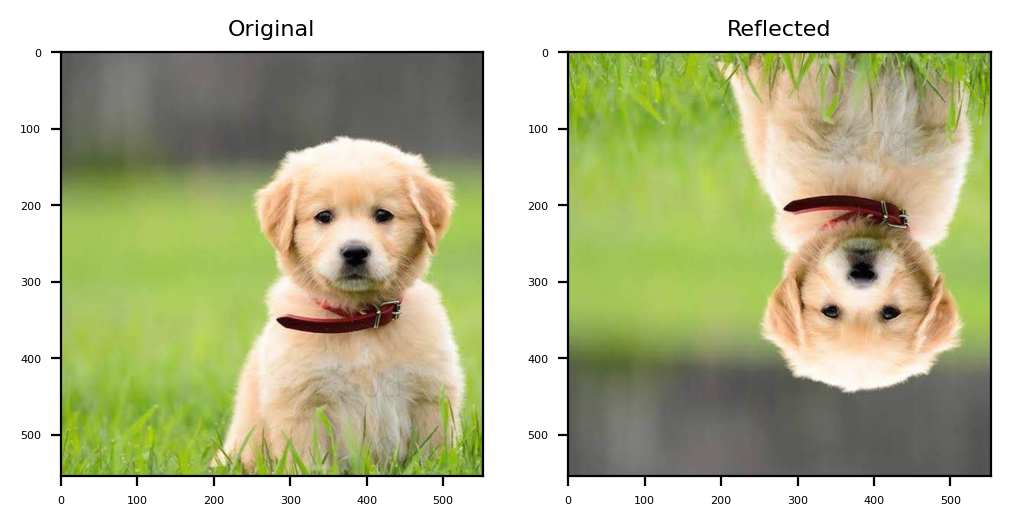

In [195]:
image = cv.cvtColor(cv.imread('./photos/dog.jpg'), cv.COLOR_BGR2RGB)    
reflect(image, direction="x")   

### Y axis reflection

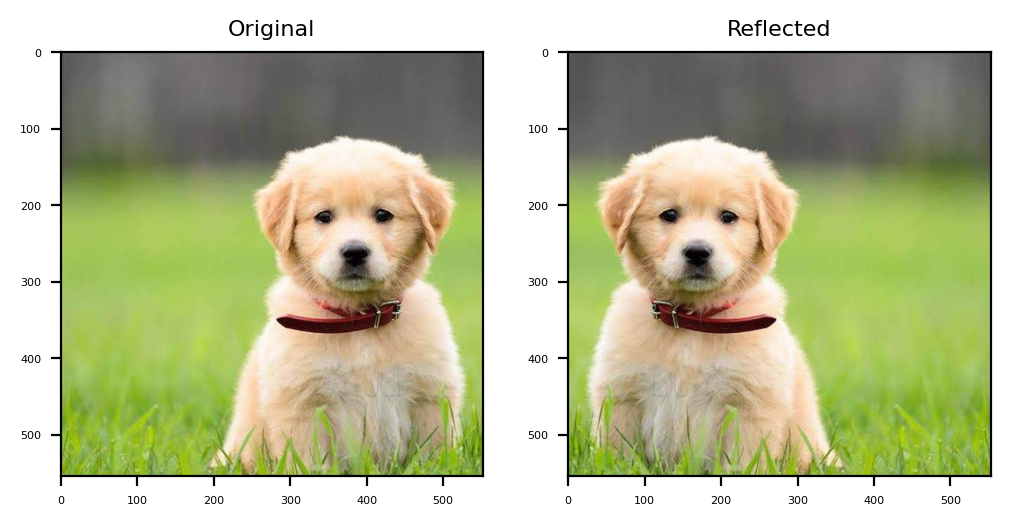

In [196]:
image = cv.cvtColor(cv.imread('./photos/dog.jpg'), cv.COLOR_BGR2RGB)    
reflect(image, direction="y")   

## Perspective Transformation

<b> The most obvious thing that differentiate affine transformation and perspective transformation is that affine transformation maps parellel lines to parellel lines. In all the operations that we did previously, image's parellel lines stayed as parellel even after the transformation is done. But in perspective transformation it is not the case, it is a perspective, or it is how you see a 2D surface in different angles. Here the parellel lines might get joined at some point. That is one of the biggest difference between affine and perspective.
    
In opencv we have warpPerspective function to make perspective transformation effect. This function takes a 3 x 3 matrix as the transform matrix.    
    
Previously we used three points to have the affine transformation matrix, but in perspective transformation we need 4 points. Look at the following example,    

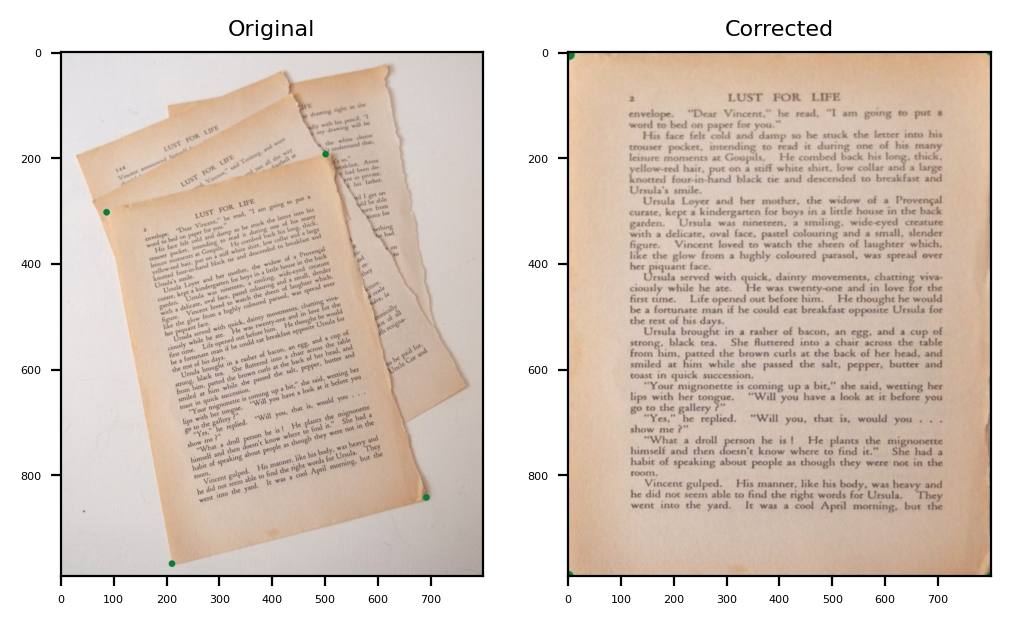

In [201]:
# let's create a function to get the correct perspective
def perspective(image, pts1, pts2):
    height = image.shape[0]
    width = image.shape[1]
    
    M = cv.getPerspectiveTransform(pts1, pts2)
    # this makes our lives easy, it will return the relevent transform matrix for us
    
    corrected = cv.warpPerspective(image, M, (width, height))
    
    showTwoImages(image, corrected, "Original", "Corrected")
    

# here we need to pass 4 points to get the corrected perspective
# pts1 means the points of the input image
pts1 = np.float32([
    [85,300],
    [500,195],
    [210,968],
    [690, 842]
])    

# pts2 means the points of the output image or how the inputs points should be changed
pts2 = np.float32([
    [0,0],
    [800,0],
    [0,990],
    [800, 990]
])    
    
image = cv.cvtColor(cv.imread('./photos/page.jpg'), cv.COLOR_BGR2RGB)

perspective(image, pts1, pts2)